<a href="https://colab.research.google.com/github/AlaaDiab7/Machine-Learning-with-Python-Zero-to-GBMs/blob/main/python_random_forests_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('python-random-forests-assignment')
jovian.set_colab_id('1x_ezYqjBt26w8hm6Y-7m7smj5xwykCBq')

# Assignment - Decision Trees and Random Forests

![](https://i.imgur.com/3sw1fY9.jpg)

In this assignment, you'll continue building on the previous assignment to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). 

We'll follow a step-by-step process:

1. Download and prepare the dataset for training
2. Train, evaluate and interpret a decision tree
3. Train, evaluate and interpret a random forest
4. Tune hyperparameters to improve the model
5. Make predictions and save the model

As you go through this notebook, you will find a **???** in certain places. Your job is to replace the **???** with appropriate code or values, to ensure that the notebook runs properly end-to-end and your machine learning model is trained properly without errors. 

**Guidelines**

1. Make sure to run all the code cells in order. Otherwise, you may get errors like `NameError` for undefined variables.
2. Do not change variable names, delete cells, or disturb other existing code. It may cause problems during evaluation.
3. In some cases, you may need to add some code cells or new statements before or after the line of code containing the **???**. 
4. Since you'll be using a temporary online service for code execution, save your work by running `jovian.commit` at regular intervals.
5. Review the "Evaluation Criteria" for the assignment carefully and make sure your submission meets all the criteria.
6. Questions marked **(Optional)** will not be considered for evaluation and can be skipped. They are for your learning.
7. It's okay to ask for help & discuss ideas on the [community forum](https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-2/99), but please don't post full working code, to give everyone an opportunity to solve the assignment on their own.


**Important Links**:

- Make a submission here: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests
- Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-2/99
- Review this Jupyter notebook: https://jovian.ai/aakashns/sklearn-decision-trees-random-forests


## How to Run the Code and Save Your Work

**Option 1: Running using free online resources (1-click, recommended):** The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.


**Option 2: Running on your computer locally:** To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

**Saving your work**: You can save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later and continue your work. Keep saving your work by running `jovian.commit` from time to time.

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [5]:
jovian.commit(project='python-random-forests-assignment', privacy='secret')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

Let's begin by installing the required libraries.

In [6]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

In [7]:
!pip install pandas numpy matplotlib seaborn --quiet

## Download and prepare the dataset for training

In [8]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataset_url, 'house-prices.zip')
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')
    
os.listdir('house-prices')

['test.csv', 'sample_submission.csv', 'train.csv', 'data_description.txt']

In [9]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

prices_df = pd.read_csv('house-prices/train.csv')
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = prices_df.columns[1:-1], prices_df.columns[-1]
inputs_df, targets = prices_df[input_cols].copy(), prices_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = prices_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = prices_df[input_cols].select_dtypes(include='object').columns.tolist()

# Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

Let's save our work before continuing.

In [11]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

## Decision Tree


> **QUESTION 1**: Train a decision tree regressor using the training set.

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Create the model
tree = DecisionTreeRegressor(random_state=42)

In [14]:
# Fit the model to the training data
tree.fit(train_inputs, train_targets)

DecisionTreeRegressor(random_state=42)

Let's save our work before continuing.

In [15]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

> **QUESTION 2**: Generate predictions on the training and validation sets using the trained decision tree, and compute the RMSE loss.

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
tree_train_preds = tree.predict(train_inputs)

In [18]:
tree_train_rmse = mean_squared_error(train_targets,tree_train_preds)

In [19]:
tree_val_preds = tree.predict(val_inputs)

In [20]:
tree_val_rmse = mean_squared_error(val_targets,tree_val_preds)

In [21]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 1429057134.4054794


Let's save our work before continuing.

In [22]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

> **QUESTION 3**: Visualize the decision tree (graphically and textually) and display feature importances as a graph. Limit the maximum depth of graphical visualization to 3 levels.

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

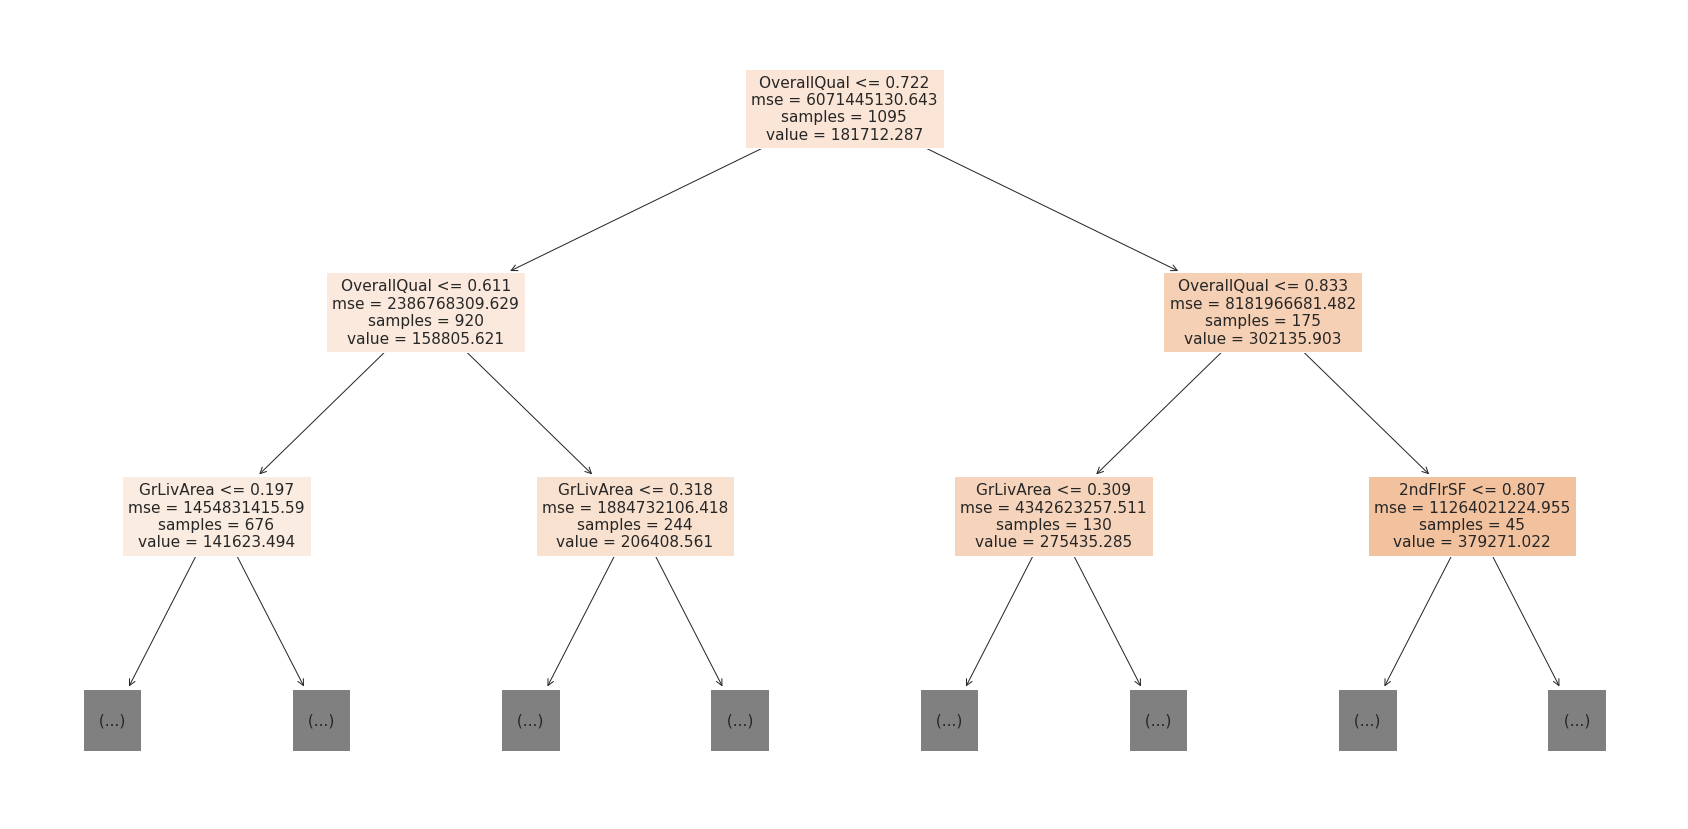

In [24]:
plt.figure(figsize=(30,15))

# Visualize the tree graphically using plot_tree
plot_tree(tree, feature_names=train_inputs.columns, max_depth=2, filled=True);

In [25]:
tree.tree_.max_depth

20

In [26]:
# Visualize the tree textually using export_text
tree_text = export_text(tree, max_depth=10, feature_names=list(train_inputs.columns))
print(tree_text[:5000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- OverallQual <= 0.39
|   |   |   |   |   |--- GarageCond_TA <= 0.50
|   |   |   |   |   |   |--- LotArea <= 0.04
|   |   |   |   |   |   |   |--- CentralAir_Y <= 0.50
|   |   |   |   |   |   |   |   |--- YearBuilt <= 0.54
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [39300.00]
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml >  0.50
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF <= 0.09
|   |   |   |   |   |   |   |   |   |   |   |--- value: [34900.00]
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF >  0.09
|   |   |  

In [27]:
# Display the first few lines
print(tree_text[:2000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- OverallQual <= 0.39
|   |   |   |   |   |--- GarageCond_TA <= 0.50
|   |   |   |   |   |   |--- LotArea <= 0.04
|   |   |   |   |   |   |   |--- CentralAir_Y <= 0.50
|   |   |   |   |   |   |   |   |--- YearBuilt <= 0.54
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [39300.00]
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml >  0.50
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF <= 0.09
|   |   |   |   |   |   |   |   |   |   |   |--- value: [34900.00]
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF >  0.09
|   |   |  

In [28]:
# Check feature importance
tree_importances = tree.feature_importances_
#tree_importances

In [29]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [30]:
tree_importance_df

,feature,importance
3,OverallQual,0.632537
15,GrLivArea,0.104334
13,2ndFlrSF,0.031896
11,TotalBsmtSF,0.028504
12,1stFlrSF,0.026730
...,...,...
104,Condition2_RRAn,0.000000
103,Condition2_RRAe,0.000000
102,Condition2_PosN,0.000000
212,BsmtFinType2_nan,0.000000


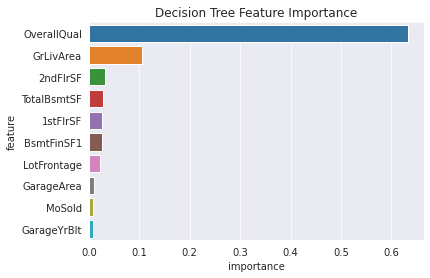

In [31]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

Let's save our work before continuing.

In [32]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

## Random Forests


> **QUESTION 4**: Train a random forest regressor using the training set.

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [35]:
# Fit the model
rf1.fit(train_inputs, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [36]:
rf1.score(train_inputs, train_targets)

0.9768157257964202

In [37]:
rf1.score(val_inputs, val_targets)

0.8894394173452205

Let's save our work before continuing.

In [38]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

> **QUESTION 5**: Make predictions using the random forest regressor.

In [39]:
?RandomForestRegressor

In [40]:
rf1_train_preds = rf1.predict(train_inputs)

In [41]:
rf1_train_rmse = mean_squared_error(train_targets,rf1_train_preds)

In [42]:
rf1_val_preds = rf1.predict(val_inputs)

In [43]:
rf1_val_rmse = mean_squared_error(val_targets,rf1_val_preds)

In [44]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 140762048.72081444, Validation RMSE: 774511050.5034367


Let's save our work before continuing.

In [45]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

## Hyperparameter Tuning

Let us now tune the hyperparameters of our model. You can find the hyperparameters for `RandomForestRegressor` here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Hyperparameters are use

Let's define a helper function `test_params` which can test the given value of one or more hyperparameters.

In [46]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

It can be used as follows:

In [47]:
test_params(n_estimators=20, max_depth=20)

(13776.89957127333, 28886.033523273858)

In [48]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

(20490.359632429263, 29804.931642791602)

Let's also define a helper function to test and plot different values of a single parameter.

In [85]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
    ## added part to the function
    min_train_error, min_val_error = min(train_errors), min(val_errors)
    min_train_err_index, min_val_err_index = train_errors.index(min_train_error), val_errors.index(min_val_error)
    return min_train_error, min_val_error, param_values[min_train_err_index], param_values[min_val_err_index]

The minimum value of RMSE for the validation is 11864.318299877767 . This correspond to the " max_depth " of 30
The minimum value of RMSE for the validation is 27731.20665420003 . This correspond to the " max_depth " of 20


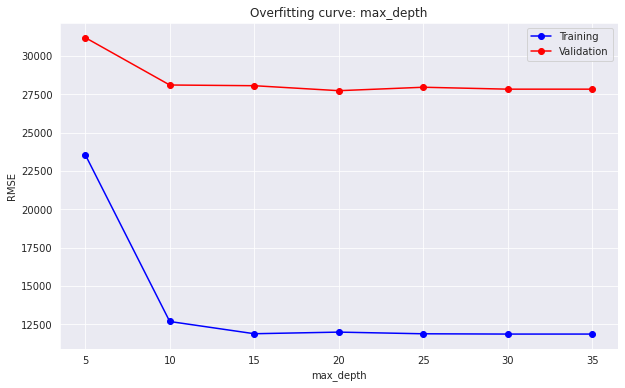

In [90]:
tuned_Parameter = 'max_depth'
test_values = [5, 10, 15, 20, 25, 30, 35]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the validation is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )


From the above graph, it appears that the best value for `max_depth` is around 20, beyond which the model starts to overfit.

In [139]:
b_max_depth=20

Let's save our work before continuing.

In [51]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

> **QUESTION 6**: Use the `test_params` and `test_param_and_plot` functions to experiment with different values of the  hyperparmeters like `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_features`, `max_leaf_nodes`, `min_impurity_decrease`, `min_impurity_split` etc. You can learn more about the hyperparameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [58]:
test_params(max_leaf_nodes=2**5)

(21669.165049500436, 29829.816545241356)

In [59]:
test_params(max_leaf_nodes=2**20)

(12063.419360016911, 27563.860779941115)

In [60]:
test_params(max_leaf_nodes=2**25)

(12063.419360016911, 27563.860779941115)

The minimum value of RMSE for the training is 12063.419360016911 . This correspond to the " max_leaf_nodes " of 1024
The minimum value of RMSE for the validation is 27563.860779941115 . This correspond to the " max_leaf_nodes " of 1024


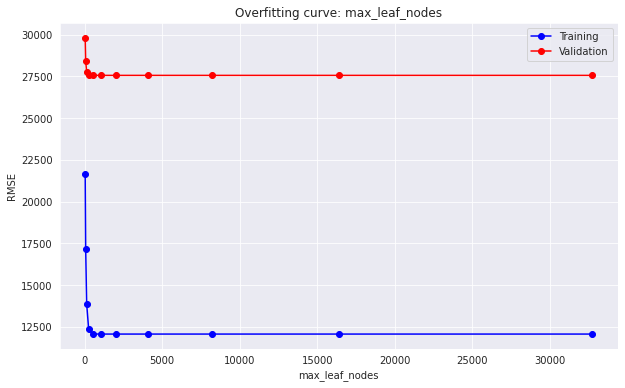

In [107]:
tuned_Parameter = 'max_leaf_nodes'
test_values = [2**5, 2**6, 2**7, 2**8, 2**9,2**10,2**11,2**12,2**13,2**14,2**15]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )


The minimum value of RMSE for the training is 12063.419360016911 . This correspond to the " max_leaf_nodes " of 1024
The minimum value of RMSE for the validation is 27563.860779941115 . This correspond to the " max_leaf_nodes " of 1024


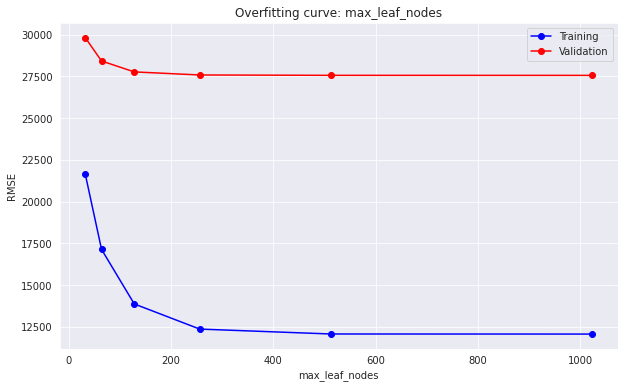

In [106]:
tuned_Parameter = 'max_leaf_nodes'
test_values = [2**5, 2**6, 2**7, 2**8, 2**9,2**10]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

In [138]:
b_max_leaf_nodes = 2**10

From this graph, we can see that the best value for `max_leaf_nodes` parameter is $2^{10}$ which is equal to $1024$


---



---



In [61]:
test_params(min_samples_split=3, min_samples_leaf=2)

(14373.98488871662, 27374.194811726316)

In [62]:
test_params(min_samples_split=100, min_samples_leaf=60)

(42012.26656816848, 46564.7215120142)

In [76]:
test_params(min_samples_split=50, min_samples_leaf=30)

(33442.6438852078, 38012.81693687174)

In [77]:
test_params(min_samples_split=50, min_samples_leaf=40)

(35695.95863572308, 39999.76599810093)

In [74]:
test_params(min_samples_split=0.99)

(77919.72053219781, 83750.40817421286)

In [73]:
test_params(min_samples_split=2)

(11864.318299877767, 27830.03863639856)

In [76]:
test_params(min_samples_split=0.7)

(77919.72053219781, 83750.40817421286)

In [75]:
test_params(min_samples_split=3)

(12232.781522986244, 27730.526189203676)

In [78]:
test_params(min_samples_split=4)

(13032.092652659161, 28431.98904011738)

The minimum value of RMSE for the training is 11864.318299877767 . This correspond to the " min_samples_split " of 0.0001
The minimum value of RMSE for the validation is 27582.77712449689 . This correspond to the " min_samples_split " of 7


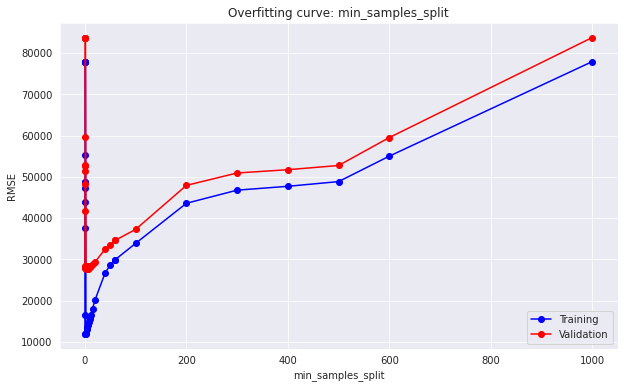

In [105]:
tuned_Parameter = 'min_samples_split'
test_values = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 2,3,4,4,5,6,7,8,9,10,11,15,20,40,50,60,60,100,200,300,400,500,600,1000]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

The minimum value of RMSE for the training is 11864.318299877767 . This correspond to the " min_samples_split " of 2
The minimum value of RMSE for the validation is 27582.77712449689 . This correspond to the " min_samples_split " of 7


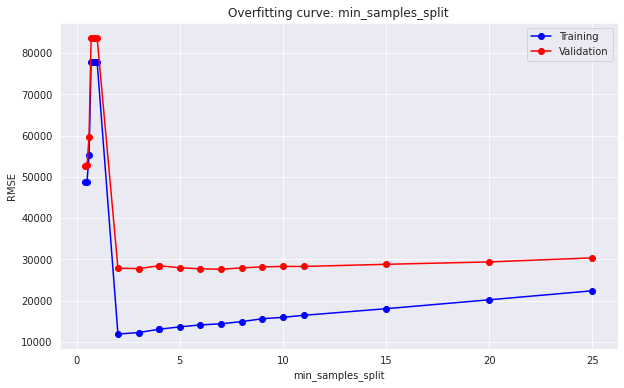

In [104]:
tuned_Parameter = 'min_samples_split'
test_values = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99,2,3,4,4,5,6,7,8,9,10,11,15,20,25]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

In [142]:
b_min_samples_split = 2

 From this graph, we can see that the best value for `min_samples_split` parameter is $2$ 

In [78]:
test_params(min_impurity_decrease=1e-7)

(11864.318299877767, 27830.03863639856)

In [79]:
test_params(min_impurity_decrease=1e-2)

(11864.318299877767, 27830.03863639856)

In [80]:
test_params(min_impurity_decrease=1e-1)

(11864.318371386118, 27830.03873761508)

The minimum value of RMSE for the training is 11864.317692787457 . This correspond to the " min_impurity_decrease " of 1
The minimum value of RMSE for the validation is 27827.140962739686 . This correspond to the " min_impurity_decrease " of 10


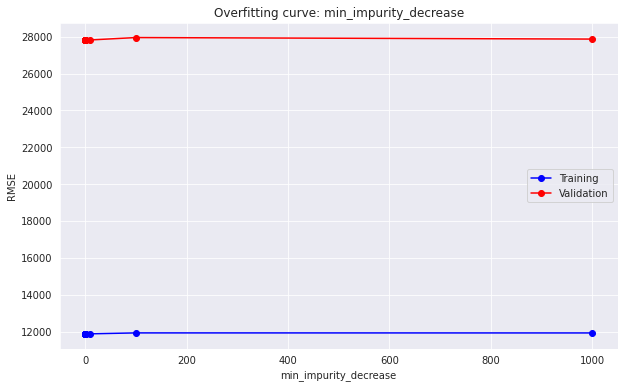

In [103]:
tuned_Parameter = 'min_impurity_decrease'
test_values = [1e-10000, 1e-1000,1e-100,1e-10,1e-5,1e-4,1e-3,1e-2,1e-1, 1, 10, 100,1000]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )


The minimum value of RMSE for the training is 11864.317692787457 . This correspond to the " min_impurity_decrease " of 0.9
The minimum value of RMSE for the validation is 27830.03873761508 . This correspond to the " min_impurity_decrease " of 0.1


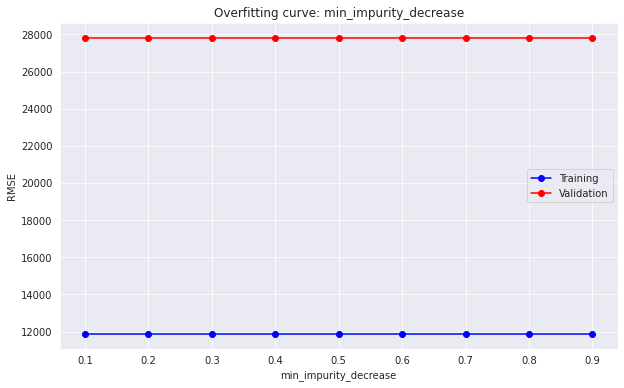

In [102]:
tuned_Parameter = 'min_impurity_decrease' 
test_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

In [141]:
b_min_impurity_decrease = 0

no change in performance regarding the `min_impurity_decrease` parameter

The minimum value of RMSE for the training is 11291.56018109444 . This correspond to the " n_estimators " of 350
The minimum value of RMSE for the validation is 26987.529856205845 . This correspond to the " n_estimators " of 350


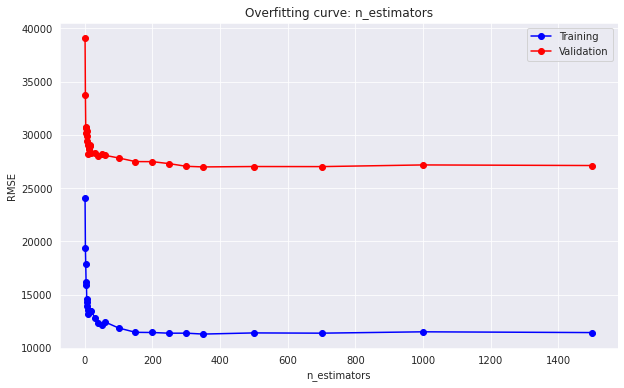

In [109]:
tuned_Parameter = 'n_estimators'
test_values = [1,2,3,4,5,6,7,8,9,10,12,13,15,16,20,30,40,50,60,100,150,200,250,300,350,500,700,1000,1500]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

The minimum value of RMSE for the training is 11291.56018109444 . This correspond to the " n_estimators " of 350
The minimum value of RMSE for the validation is 26928.631196305498 . This correspond to the " n_estimators " of 425


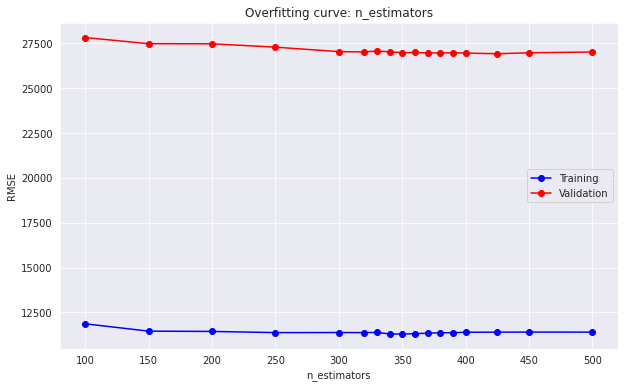

In [110]:
tuned_Parameter = 'n_estimators'
test_values = [100,150,200,250,300,320,330,340,350,360,370,380,390,400,425,450,500]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

In [140]:
b_n_estimators = 425

 From this graph, we can see that the best value for `n_estimators` parameter is $425$ 



The minimum value of RMSE for the training is 11864.318299877767 . This correspond to the " min_samples_leaf " of 1
The minimum value of RMSE for the validation is 27374.194811726313 . This correspond to the " min_samples_leaf " of 2


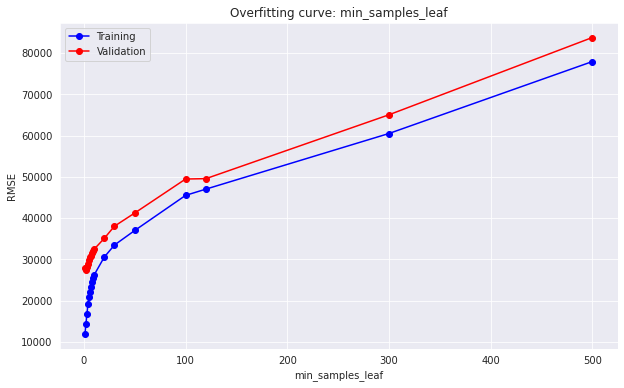

In [111]:
tuned_Parameter = 'min_samples_leaf'
test_values = [1,2,3,4,5,6,7,8,9,10,20,30,50,100,120,300,500]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

The minimum value of RMSE for the training is 11864.318299877767 . This correspond to the " min_samples_leaf " of 1
The minimum value of RMSE for the validation is 27374.194811726313 . This correspond to the " min_samples_leaf " of 2


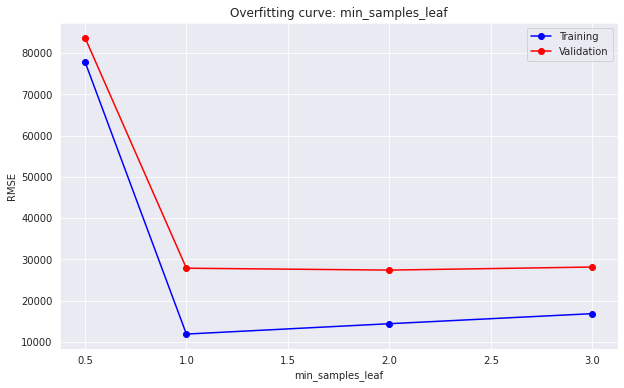

In [113]:
tuned_Parameter = 'min_samples_leaf'
test_values = [0.5,1,2,3]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

In [143]:
b_min_samples_leaf = 2

 From this graph, we can see that the best value for `min_samples_leaf` parameter is $1$ or $2$ 

The minimum value of RMSE for the training is 11864.318299877767 . This correspond to the " min_weight_fraction_leaf " of 0
The minimum value of RMSE for the validation is 27830.03863639856 . This correspond to the " min_weight_fraction_leaf " of 0


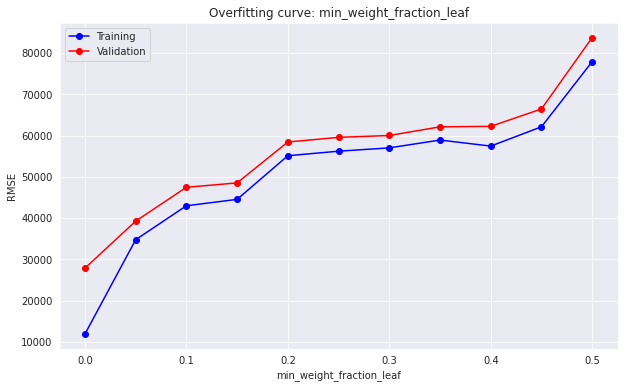

In [145]:
tuned_Parameter = 'min_weight_fraction_leaf'
test_values = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

In [146]:
b_min_weight_fraction_leaf = 0

 From this graph, we can see that the best value for `min_weight_fraction_leaf` parameter is $0$

In [118]:
#    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
len(train_inputs)

1095

The minimum value of RMSE for the training is 11427.4569622278 . This correspond to the " max_features " of 100
The minimum value of RMSE for the validation is 26404.64581145571 . This correspond to the " max_features " of 120


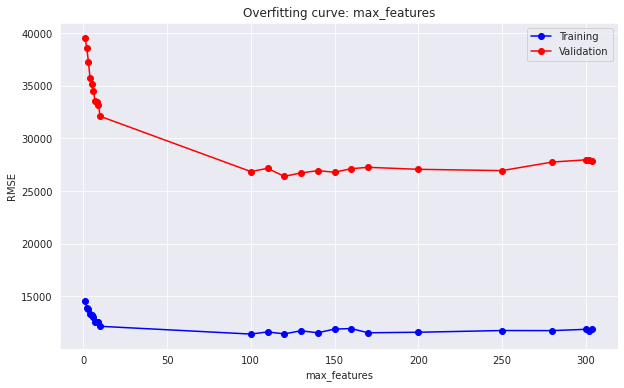

In [134]:
tuned_Parameter = 'max_features'
test_values = [1,2,3,4,5,6,7,8,9,10,100,110,120,130,140,150,160,170,200,250,280,300,302,304]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

In [147]:
b_max_features = 120

 From this graph, we can see that the best value for `max_features` parameter is $120$  

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:321: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:321: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:321: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:321: Futu

The minimum value of RMSE for the training is 11864.318299877767 . This correspond to the " min_impurity_split " of 0
The minimum value of RMSE for the validation is 27830.03863639856 . This correspond to the " min_impurity_split " of 0


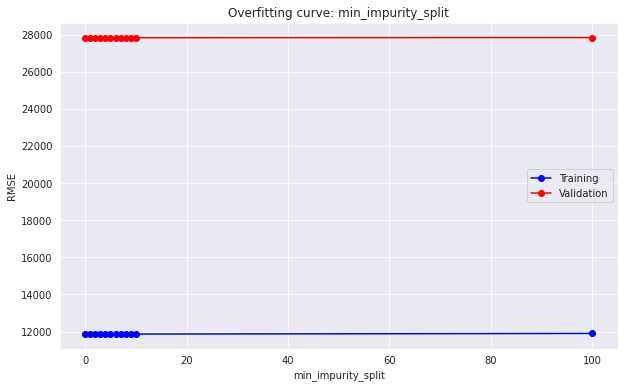

In [136]:
tuned_Parameter = 'min_impurity_split'
test_values = [0,1,2,3,4,5,6,7,8,9,10,100,]#110,120,130,140,150,160,170,200,250,280,300,302,304]
min_train_error, min_val_error, param_values_for_min_train_err, param_values_for_min_val_err = test_param_and_plot(tuned_Parameter, test_values)
print('The minimum value of RMSE for the training is',min_train_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_train_err )
print('The minimum value of RMSE for the validation is',min_val_error, '. This correspond to the "',tuned_Parameter,'" of',param_values_for_min_val_err )

In [148]:
b_min_impurity_split = 0

We see that there is a warning message saying:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead. 

So this parameter will not be used later. We can assign its value to zero

Let's save our work before continuing.

In [137]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

## Training the Best Model

> **QUESTION 7**: Train a random forest regressor model with your best hyperparameters to minimize the validation loss.

In [151]:
# Create the model with custom hyperparameters
rf2 = RandomForestRegressor(n_estimators= b_n_estimators , max_depth= b_max_depth, min_samples_split= b_min_samples_split, 
                            min_samples_leaf= b_min_samples_leaf, min_weight_fraction_leaf= b_min_weight_fraction_leaf, 
                            max_features= b_max_features, max_leaf_nodes= b_max_leaf_nodes, 
                            min_impurity_decrease= b_min_impurity_decrease, n_jobs= -1)

In [152]:
# Train the model
rf2.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=20, max_features=120, max_leaf_nodes=1024,
                      min_impurity_decrease=0, min_samples_leaf=2,
                      min_weight_fraction_leaf=0, n_estimators=425, n_jobs=-1)

Let's save our work before continuing.

In [153]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

> **QUESTION 8**: Make predictions and evaluate your final model. If you're unhappy with the results, modify the hyperparameters above and try again.

In [154]:
rf2_train_preds = rf2.predict(train_inputs)

In [159]:
rf2_train_rmse = mean_squared_error(train_targets,rf2_train_preds)

In [160]:
rf2_val_preds = rf2.predict(val_inputs)

In [161]:
rf2_val_rmse = mean_squared_error(val_targets,rf2_val_preds)

In [162]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 197101335.02023435, Validation RMSE: 711769597.5296229


Let's also view and plot the feature importances.

In [163]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [164]:
rf2_importance_df

,feature,importance
3,OverallQual,0.293313
15,GrLivArea,0.130720
25,GarageCars,0.088755
172,ExterQual_TA,0.050550
5,YearBuilt,0.048909
...,...,...
59,LotConfig_FR3,0.000000
168,MasVnrType_nan,0.000000
159,Exterior2nd_Stone,0.000000
157,Exterior2nd_Other,0.000000


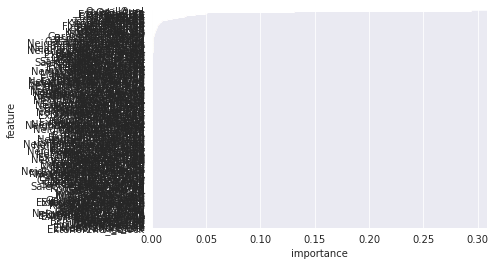

In [165]:
sns.barplot(data=rf2_importance_df, x='importance', y='feature')

Let's save our work before continuing.

In [166]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

## Make a Submission

To make a submission, just execute the following cell:

In [167]:
jovian.submit('zerotogbms-a2')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests


You can also submit your Jovian notebook link on the assignment page: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests

Make sure to review the evaluation criteria carefully. You can make any number of submissions, and only your final submission will be evalauted.

Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-2/99

NOTE: **The rest of this assignment is optional.**

## Making Predictions on the Test Set

Let's make predictions on the test set provided with the data.

In [168]:
test_df = pd.read_csv('house-prices/test.csv')

In [169]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

First, we need to reapply all the preprocessing steps.

In [170]:
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

In [171]:
test_inputs = test_df[numeric_cols + encoded_cols]

We can now make predictions using our final model.

In [172]:
test_preds = rf2.predict(test_inputs)

In [173]:
submission_df = pd.read_csv('house-prices/sample_submission.csv')

In [174]:
submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


Let's replace the values of the `SalePrice` column with our predictions.

In [187]:
submission_df['SalePrice'] = test_preds

Let's save it as a CSV file and download it.

In [188]:
submission_df.to_csv('submission.csv', index=False)

In [189]:
from IPython.display import FileLink
FileLink('submission.csv') # Doesn't work on Colab, use the file browser instead to download the file.

/content/submission.csv

We can now submit this file to the competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submissions

![](https://i.imgur.com/6h2vXRq.png)


> **(OPTIONAL) QUESTION**: Submit your predictions to the competition. Experiment with different models, feature engineering strategies and hyperparameters and try to reach the top 10% on the leaderboard.

Let's save our work before continuing.

In [178]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

### Making Predictions on Single Inputs

In [179]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    return model.predict(input_df[numeric_cols + encoded_cols])[0]

In [180]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [181]:
predicted_price = predict_input(rf2, sample_input)

In [182]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $123457.72079831935


> **EXERCISE**: Change the sample input above and make predictions. Try different examples and try to figure out which columns have a big impact on the sale price. Hint: Look at the feature importance to decide which columns to try.

### Saving the Model

In [183]:
import joblib

In [184]:
house_prices_rf = {
    'model': rf2,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [185]:
joblib.dump(house_prices_rf, 'house_prices_rf.joblib')

['house_prices_rf.joblib']

Let's save our work before continuing.

In [186]:
jovian.commit(outputs=['house_prices_rf.joblib'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
Committed successfully! https://jovian.ai/alaa-diab7777/python-random-forests-assignment


'https://jovian.ai/alaa-diab7777/python-random-forests-assignment'

### Predicting the Logarithm of Sale Price

> **(OPTIONAL) QUESTION**: In the [original Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation), the model is evaluated by computing the Root Mean Squared Error on the logarithm of the sale price. Try training a random forest to predict the logarithm of the sale price, instead of the actual sales price and see if the results you obtain are better than the models trained above.